In [1]:
using Statistics, LinearAlgebra, Plots, MAT

In [50]:
Gamma =[[0.001, 0.001], [1.0, 0.001], [1.0, 1.0], [1.0, 0.5], [0.001, 1.0], [0.5, 1.0]]

6-element Vector{Vector{Float64}}:
 [0.001, 0.001]
 [1.0, 0.001]
 [1.0, 1.0]
 [1.0, 0.5]
 [0.001, 1.0]
 [0.5, 1.0]

In [51]:
alpha = repeat([1 2], 100, 1)
theta = repeat([2 -1], 100, 1)
beta = repeat([1 -0.5], 100, 1)

g1 = repeat(Gamma[1] |> transpose, 100, 1)
g2 = repeat(Gamma[2] |> transpose, 100, 1)
g3 = repeat(Gamma[3] |> transpose, 100, 1)
g4 = repeat(Gamma[4] |> transpose, 100, 1)
g5 = repeat(Gamma[5] |> transpose, 100, 1)
g6 = repeat(Gamma[6] |> transpose, 100, 1)

100×2 Matrix{Float64}:
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0
 ⋮    
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0
 0.5  1.0

In [47]:
vars = matread("./simulation_3/records/600 f1 d0 g5.mat")

Dict{String, Any} with 4 entries:
  "Beta"  => [1.23648 0.0462806; 0.527803 -0.262096; … ; 0.618455 -0.21138; 1.4…
  "Gamma" => [-0.00877625 0.0164897; 0.00708874 -0.0377016; … ; 0.0148318 0.029…
  "Theta" => [1.66605 -0.626775; 1.95402 -0.987448; … ; 1.71079 -0.738966; 0.51…
  "Alpha" => [0.352111 0.935958; -0.451024 -0.892512; … ; 0.396534 0.91802; -0.…

In [65]:
vars = matread("./simulation_3/records/300 f1 d0 g6.mat")

Dict{String, Any} with 4 entries:
  "Beta"  => [-0.429661 -0.360561; 1.00345 0.0602205; … ; -0.747804 -0.68478; 1…
  "Gamma" => [0.218619 -0.0301078; 0.0922537 -0.119079; … ; 0.263296 -0.149202;…
  "Theta" => [1.86939 -0.7968; 1.28422 -0.424446; … ; 1.87164 -0.989179; 1.4391…
  "Alpha" => [-0.392103 -0.919921; -0.313813 -0.949485; … ; -0.467264 -0.884118…

In [66]:
a = vars["Alpha"]
b = vars["Beta"]
t = vars["Theta"]
g = vars["Gamma"]
sa = sign.(a * [1, 2]/sqrt(5))
ga = g.* sa
gt = g1
mse = (ga - gt).^2 
mean(ga, dims = 1) 

1×2 Matrix{Float64}:
 -0.0384511  -0.0584225

In [53]:
mse = (ga - gt).^2 
mean(mse, dims = 1) 

1×2 Matrix{Float64}:
 0.0728638  0.0144538

In [54]:
var(mse, dims = 1)

1×2 Matrix{Float64}:
 0.206041  0.00459916

In [67]:
mean(mse, dims = 1) 

1×2 Matrix{Float64}:
 0.120061  0.0739103

In [68]:
var(mse, dims = 1)

1×2 Matrix{Float64}:
 0.0856821  0.0869012

In [192]:
ga

100×2 Matrix{Float64}:
 -0.0840121  0.857426
 -0.0633903  0.767602
  0.396944   0.761198
  0.0558703  1.02726
  0.101937   1.0224
 -0.234198   1.06752
  0.412026   1.74217
  0.671837   0.984628
  0.247642   0.958063
 -0.0622126  0.930994
 -0.23615    1.01327
  0.0119933  1.08632
 -0.508638   1.11643
  ⋮          
 -0.659851   0.0180111
  0.311254   1.04674
  0.0811822  0.847786
  0.065669   1.16454
 -0.0497105  0.837785
  0.0347827  0.994476
  0.165937   1.09544
  0.100691   1.37025
 -0.349382   0.966852
  0.125798   1.27966
  0.412041   1.15477
  0.123687   1.89746

In [19]:
g

100×2 Matrix{Float64}:
 -0.744734  -0.308572
  0.779654   0.376991
  0.640565   0.406015
  1.05603    0.631737
 -0.895427  -0.481463
  0.621042   0.318373
 -1.38011   -0.677878
 -0.766902  -0.342779
  0.789993   0.280395
  0.405028  -0.184935
  0.800911   0.389363
  0.573908   0.330617
  0.602567   0.3329
  ⋮         
 -0.725363  -0.466983
 -0.788966  -0.500424
  0.704107   0.512415
  0.866354   0.43902
 -0.635155  -0.85867
 -0.934794  -0.45689
  0.895771   0.429529
  0.817333   0.474787
 -0.857753  -0.244663
 -0.935526  -0.397547
  0.716211   0.444846
  0.826797   0.315186

In [21]:
using Clustering

In [40]:
rg = kmeans(g |> transpose, 2)

KmeansResult{Matrix{Float64}, Float64, Int64}([-0.7638512542616492 0.8468333503436123; -0.3790051252851187 0.402614914487602], [1, 2, 2, 2, 1, 2, 1, 1, 2, 2  …  2, 2, 1, 1, 2, 2, 1, 1, 2, 2], [0.0053262313736526234, 0.005169602148546559, 0.042558078308019054, 0.09626018646624512, 0.027809689798083737, 0.058078599337918924, 0.4690979119009304, 0.0013216394468735793, 0.018168521381235703, 0.5404066300387914  …  0.032426762541451604, 0.0017063734841731293, 0.24664082078936111, 0.03528730349881237, 0.0031192781161399896, 0.006079021769554105, 0.02686537888098406, 0.029815986525311367, 0.018845667472115135, 0.008045289377076381], [42, 58], [42, 58], 9.12071206824338, 2, true)

In [41]:
ind1 = rg.assignments .== 1
ind2 = rg.assignments .== 2
g1 = g[ind1, :]
g2 = g[ind2, :]

58×2 Matrix{Float64}:
 0.779654   0.376991
 0.640565   0.406015
 1.05603    0.631737
 0.621042   0.318373
 0.789993   0.280395
 0.405028  -0.184935
 0.800911   0.389363
 0.573908   0.330617
 0.602567   0.3329
 1.01435    0.535392
 0.72374    0.378236
 1.28003    0.456503
 0.887125   0.511508
 ⋮         
 0.981893   0.307786
 0.832575   0.452173
 0.923845   0.4042
 0.645321   0.385407
 0.82117    0.395622
 0.969629   0.53706
 0.704107   0.512415
 0.866354   0.43902
 0.895771   0.429529
 0.817333   0.474787
 0.716211   0.444846
 0.826797   0.315186

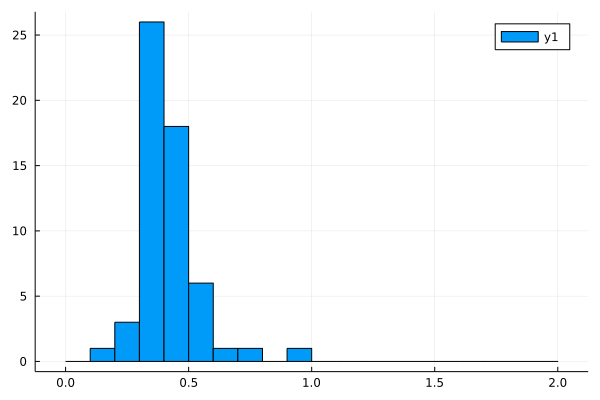

In [46]:
histogram(g2[:,2], bins = 0:0.1:2)

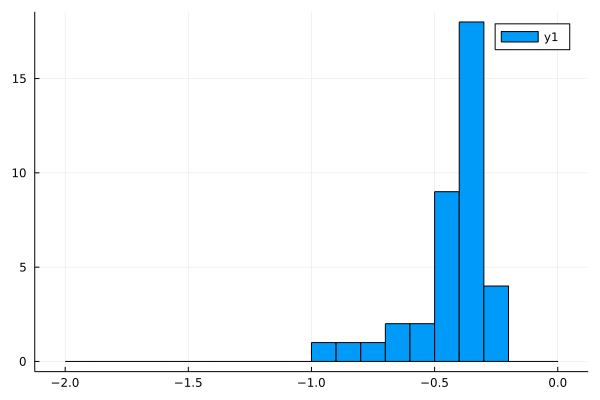

In [45]:
histogram(g1[:,2], bins = -2:0.1:0)